In [73]:
# Please don't change this cell, but do make sure to run it.
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
answer_words = pd.read_csv('edited_data.csv')

In [74]:
answer_words = answer_words.drop(columns = ["RowNumber", "Unnamed: 0"])

In [75]:
answer_words["CustomerId"].unique().shape[0]
answer_words = answer_words.set_index("CustomerId")
answer_words = answer_words[answer_words["CreditScore"] <= 850]

In [76]:
def capitalize(variable):
    return variable.capitalize()

answer_words["Geography"] = answer_words["Geography"].apply(capitalize)

In [77]:
answer_words

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1.0
15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0.0
15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0.0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.1,1,1,79084.10,0.0
15592531,Bartlett,822,France,Male,50,7,0.00,2.1,1,1,10062.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0,96270.64,0.0
15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1,101699.77,0.0
15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1,42085.58,1.0


In [78]:
answer_geo = answer_words.groupby("Geography").count()
answer_geo

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,
France,5001,5001,5001,5001,5001,4995,4995,5001,5001,5001,4995
Germany,2502,2502,2502,2502,2502,2499,2500,2502,2502,2502,2499
Spain,2472,2472,2472,2472,2472,2472,2470,2472,2472,2472,2472


<AxesSubplot:xlabel='Geography'>

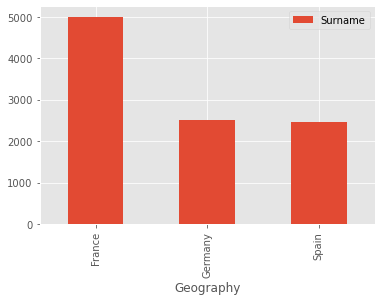

In [79]:
answer_geo.plot(kind='bar', y='Surname')

In [80]:
rev_churn = answer_words[['Balance', 'Exited']]
rev_churn = rev_churn.dropna()
rev_churn

,Balance,Exited
CustomerId,,
15634602,0.00,1.0
15647311,83807.86,0.0
15701354,0.00,0.0
15737888,125510.82,0.0
15592531,0.00,0.0
...,...,...
15606229,0.00,0.0
15569892,57369.61,0.0
15584532,0.00,1.0


In [81]:
median_rev = rev_churn.get("Balance").median()
median_rev

97125.41500000001

<AxesSubplot:title={'center':'Revenue Distribution'}, ylabel='Frequency'>

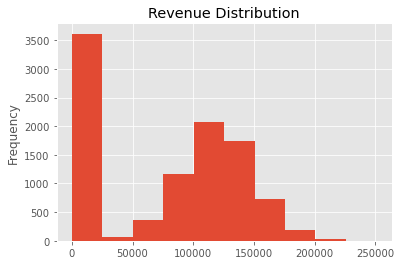

In [82]:
rev_churn.get("Balance").plot(kind='hist', title="Revenue Distribution")

In [83]:
rev_churn_lower = rev_churn[rev_churn.get('Balance') < median_rev]
mean_churn_lower = rev_churn_lower.get("Exited").mean() # average churn rate for customers with revenue less than median
rev_churn_upper = rev_churn[rev_churn.get('Balance') >= median_rev]
mean_churn_upper = rev_churn_upper.get("Exited").mean() # average churn rate for customers with revenue greater than median
labels = ["Revenue Less than $97000", "Revenue Greater than $97000"]
values = [mean_churn_lower, mean_churn_upper]

Text(0.5, 1.0, 'Customer Churn vs Revenue')

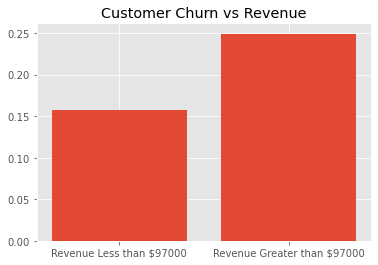

In [84]:
plt.bar(labels, values)
plt.title("Customer Churn vs Revenue")

In [97]:
credit_churn = answer_words[['CreditScore', 'Exited']]
credit_churn = credit_churn.dropna()
credit_churn

,CreditScore,Exited
CustomerId,,
15634602,619,1.0
15647311,608,0.0
15701354,699,0.0
15737888,850,0.0
15592531,822,0.0
...,...,...
15606229,771,0.0
15569892,516,0.0
15584532,709,1.0


In [98]:
def credit_group(val):
    return int(val / 100) * 100
credit_churn = credit_churn.assign(CreditScore=credit_churn.get("CreditScore").apply(credit_group))

In [101]:
credit_churn = credit_churn.groupby("CreditScore").mean()
credit_churn

,Exited
CreditScore,
300,1.000000
400,0.214403
500,0.212793
600,0.196902
700,0.198227
800,0.194487


<AxesSubplot:xlabel='CreditScore'>

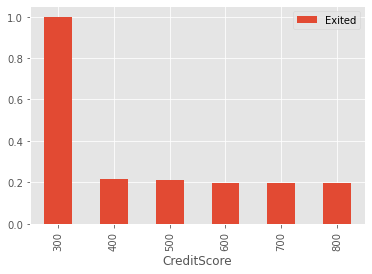

In [102]:
credit_churn.plot(kind='bar', y="Exited")